In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
df = pd.read_csv("usgs_earthquake.csv")
df

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2003-12-30 23:49:27,-8.1600,120.4850,200.000,4.7,mb,9.0,147.5,NaN,1.29,...,2014-11-07T01:20:51.696Z,"49 km N of Ruteng, Indonesia",earthquake,NaN,NaN,NaN,6.0,reviewed,us,us
1,2003-12-30 22:41:38,47.0880,154.2310,33.000,4.7,mb,64.0,138.1,NaN,1.03,...,2014-11-07T01:20:51.686Z,Kuril Islands,earthquake,NaN,NaN,NaN,31.0,reviewed,us,us
2,2003-12-30 22:40:11,-29.9400,-177.6050,33.000,4.7,mb,11.0,225.4,NaN,0.82,...,2014-11-07T01:20:51.685Z,"Kermadec Islands, New Zealand",earthquake,NaN,NaN,NaN,5.0,reviewed,us,us
3,2003-12-30 22:32:00,46.8510,154.0660,33.000,4.5,mb,10.0,236.5,NaN,0.70,...,2014-11-07T01:20:51.678Z,east of the Kuril Islands,earthquake,NaN,NaN,NaN,1.0,reviewed,us,us
4,2003-12-30 22:04:37,47.0840,154.2020,33.000,5.1,mwc,313.0,127.7,NaN,0.86,...,2016-11-10T00:19:29.999Z,Kuril Islands,earthquake,NaN,NaN,NaN,NaN,reviewed,us,hrv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175942,2025-01-01 03:58:25,-19.9201,67.2731,10.000,4.7,mb,40.0,73.0,3.678,0.49,...,2025-03-17T21:33:59.040Z,Mid-Indian Ridge,earthquake,6.15,1.846,0.102,29.0,reviewed,us,us
175943,2025-01-01 03:56:40,-23.0291,-66.6081,208.974,4.9,mww,90.0,43.0,1.449,0.92,...,2025-03-17T21:33:59.040Z,"97 km WNW of El Aguilar, Argentina",earthquake,9.81,6.217,0.057,30.0,reviewed,us,us
175944,2025-01-01 03:27:57,9.1629,40.0071,10.000,4.5,mb,54.0,64.0,1.338,0.75,...,2025-03-17T21:33:59.040Z,"26 km NW of Āwash, Ethiopia",earthquake,7.69,1.917,0.085,41.0,reviewed,us,us
175945,2025-01-01 02:00:07,-3.8521,151.6207,10.000,4.5,mb,36.0,98.0,0.591,0.98,...,2025-03-17T21:33:58.040Z,"71 km WNW of Rabaul, Papua New Guinea",earthquake,7.80,1.901,0.116,22.0,reviewed,us,us


In [ ]:
#Set datetime data
df['time'] = pd.to_datetime(df['time'])

df['year'] = df['time'].dt.year
df['month'] = df['time'].dt.month
df['day'] = df['time'].dt.day

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175947 entries, 0 to 175946
Data columns (total 25 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   time             175947 non-null  datetime64[ns]
 1   latitude         175947 non-null  float64       
 2   longitude        175947 non-null  float64       
 3   depth            175947 non-null  float64       
 4   mag              175947 non-null  float64       
 5   magType          175947 non-null  object        
 6   nst              108892 non-null  float64       
 7   gap              158846 non-null  float64       
 8   dmin             86167 non-null   float64       
 9   rms              171269 non-null  float64       
 10  net              175947 non-null  object        
 11  id               175947 non-null  object        
 12  updated          175947 non-null  object        
 13  place            175947 non-null  object        
 14  type             175

In [5]:
df.describe

<bound method NDFrame.describe of                       time  latitude  longitude    depth  mag magType    nst  \
0      2003-12-30 23:49:27   -8.1600   120.4850  200.000  4.7      mb    9.0   
1      2003-12-30 22:41:38   47.0880   154.2310   33.000  4.7      mb   64.0   
2      2003-12-30 22:40:11  -29.9400  -177.6050   33.000  4.7      mb   11.0   
3      2003-12-30 22:32:00   46.8510   154.0660   33.000  4.5      mb   10.0   
4      2003-12-30 22:04:37   47.0840   154.2020   33.000  5.1     mwc  313.0   
...                    ...       ...        ...      ...  ...     ...    ...   
175942 2025-01-01 03:58:25  -19.9201    67.2731   10.000  4.7      mb   40.0   
175943 2025-01-01 03:56:40  -23.0291   -66.6081  208.974  4.9     mww   90.0   
175944 2025-01-01 03:27:57    9.1629    40.0071   10.000  4.5      mb   54.0   
175945 2025-01-01 02:00:07   -3.8521   151.6207   10.000  4.5      mb   36.0   
175946 2025-01-01 01:47:00   -3.8682   151.6536   10.000  4.7      mb   39.0   

     

In [6]:
df.shape

(175947, 25)

In [7]:
df.isnull().sum()

time                   0
latitude               0
longitude              0
depth                  0
mag                    0
magType                0
nst                67055
gap                17101
dmin               89780
rms                 4678
net                    0
id                     0
updated                0
place                  0
type                   0
horizontalError    97140
depthError         56055
magError           91515
magNst             28465
status                 0
locationSource         0
magSource              0
year                   0
month                  0
day                    0
dtype: int64

In [8]:
df.duplicated().any()

False

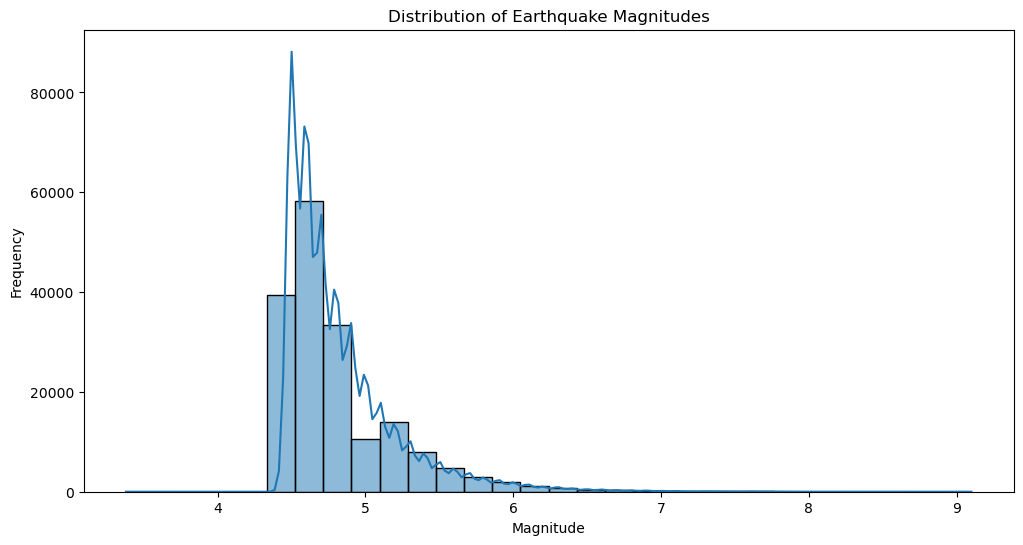

In [9]:
# Plot the distribution of earthquake magnitudes
plt.figure(figsize=(12, 6))
sns.histplot(df['mag'], bins=30, kde=True)
plt.title('Distribution of Earthquake Magnitudes')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.show()

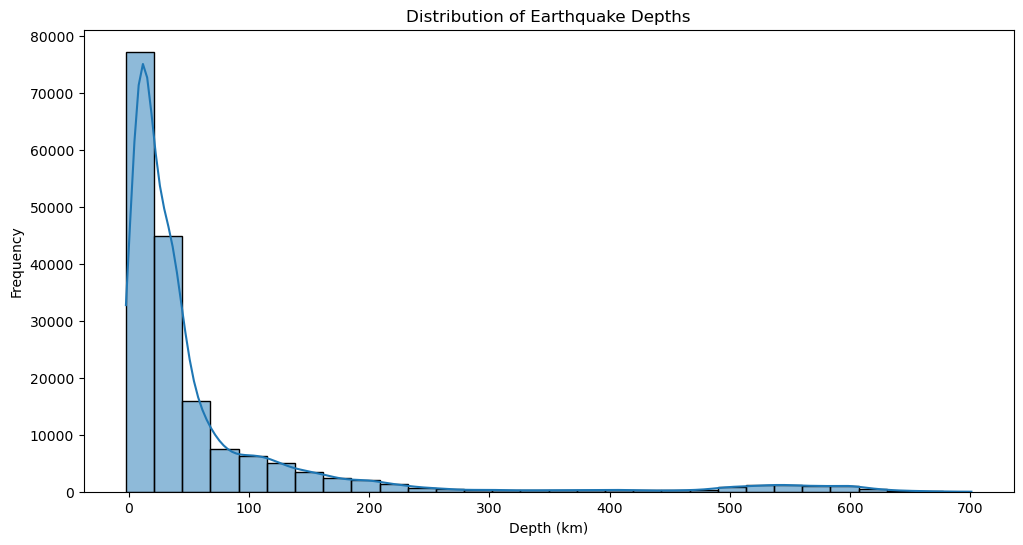

In [ ]:
# Plot the distribution of earthquake Depth
plt.figure(figsize=(12, 6))
sns.histplot(df['depth'], bins=30, kde=True)
plt.title('Distribution of Earthquake Depths')
plt.xlabel('Depth (km)')
plt.ylabel('Frequency')
plt.show()

In [11]:
# Top 10 strongest earthquakes events
top_10_strongest = df.nlargest(10, 'mag')[['time', 'place', 'mag', 'depth']]
print("Top 10 Strongest Earthquakes:")
print(top_10_strongest)

Top 10 Strongest Earthquakes:
                     time                                      place  mag  \
28218 2004-12-26 00:58:53  2004 Sumatra - Andaman Islands Earthquake  9.1   
68713 2011-03-11 05:46:24        2011 Great Tohoku Earthquake, Japan  9.1   
76326 2010-02-27 06:34:12               36 km WNW of Quirihue, Chile  8.8   
25417 2005-03-28 16:09:37            78 km WSW of Singkil, Indonesia  8.6   
89417 2012-04-11 08:38:37     off the west coast of northern Sumatra  8.6   
12669 2001-06-23 20:33:14                    6 km SSW of Atico, Peru  8.4   
36090 2007-09-12 11:10:27           122 km SW of Bengkulu, Indonesia  8.4   
42315 2006-11-15 11:14:14                              Kuril Islands  8.3   
81402 2013-05-24 05:44:49                             Sea of Okhotsk  8.3   
93863 2015-09-16 22:54:33                  48 km W of Illapel, Chile  8.3   

        depth  
28218   30.00  
68713   29.00  
76326   22.90  
25417   30.00  
89417   20.00  
12669   33.00  
36090   34

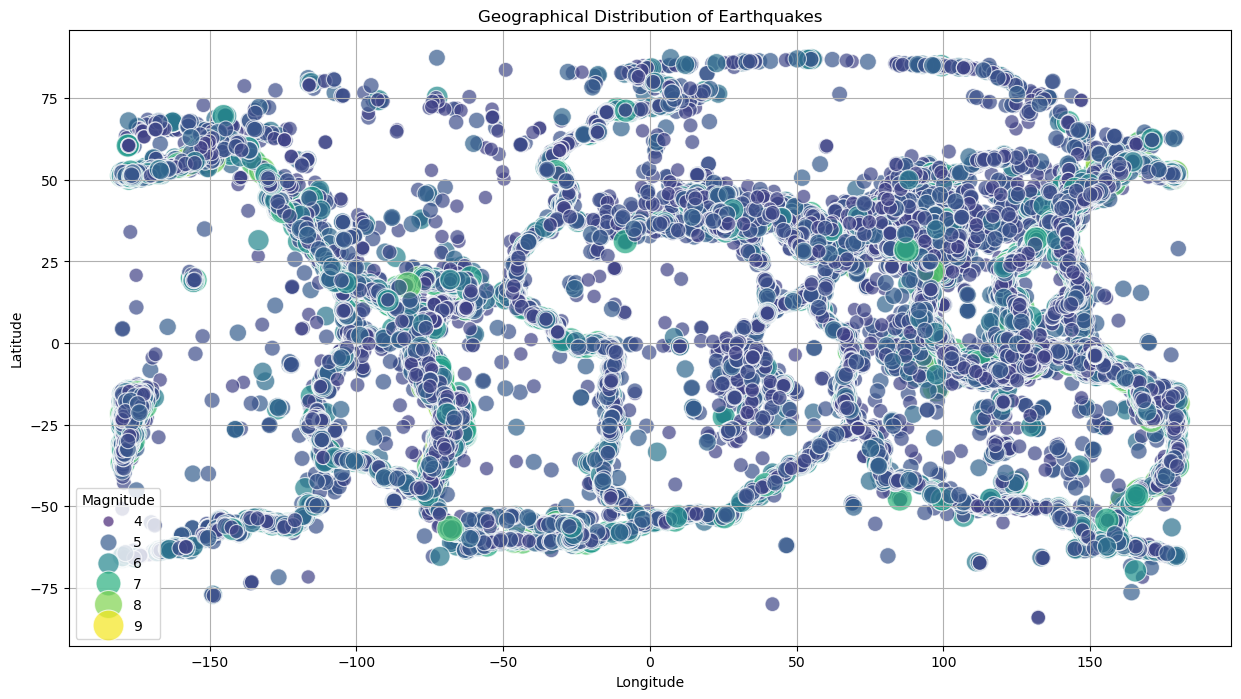

In [12]:
# Geographical Distribution of Earthquakes
plt.figure(figsize=(15, 8))
sns.scatterplot(x='longitude', y='latitude', data=df, hue='mag', size='mag', sizes=(10, 500), palette='viridis', alpha=0.7)
plt.title('Geographical Distribution of Earthquakes')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Magnitude')
plt.grid(True)
plt.show()

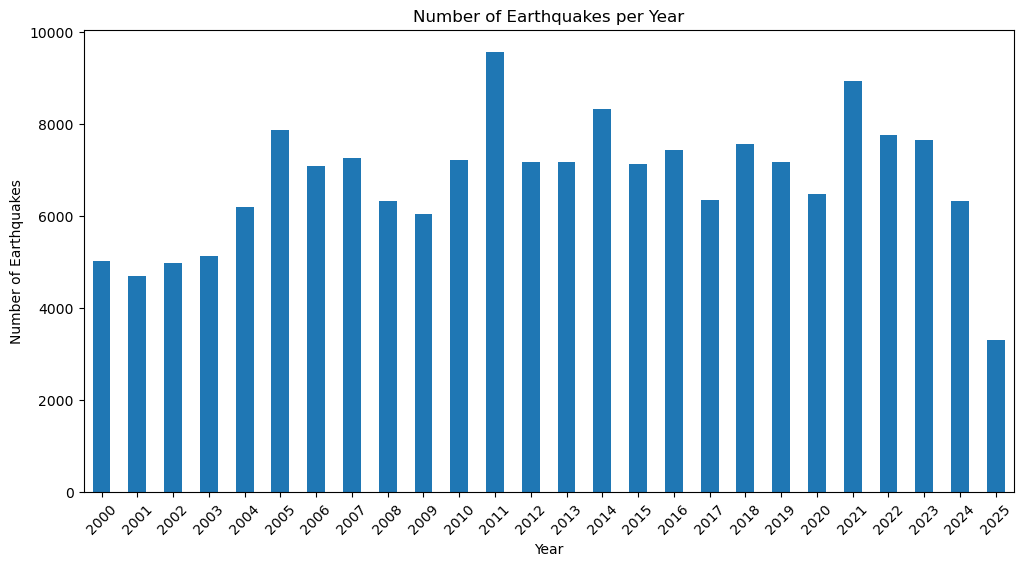

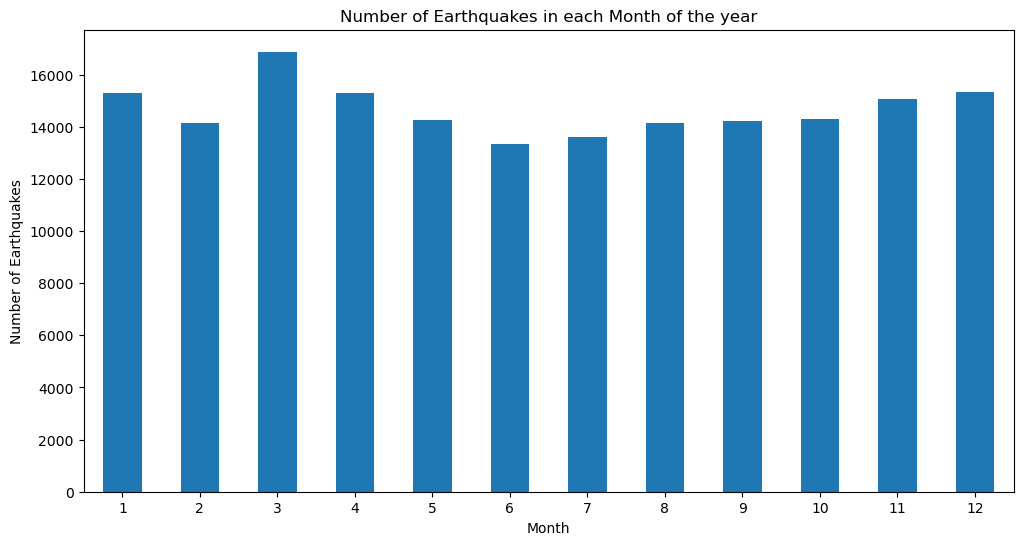

In [13]:
# Number of earthquakes per year
plt.figure(figsize=(12, 6))
df.groupby('year').size().plot(kind='bar')
plt.title('Number of Earthquakes per Year')
plt.xlabel('Year')
plt.ylabel('Number of Earthquakes')
plt.xticks(rotation=45)
plt.show()

# Number of earthquakes in each Month of the year
plt.figure(figsize=(12, 6))
df.groupby('month').size().plot(kind='bar')
plt.title('Number of Earthquakes in each Month of the year')
plt.xlabel('Month')
plt.ylabel('Number of Earthquakes')
plt.xticks(rotation=0)
plt.show()

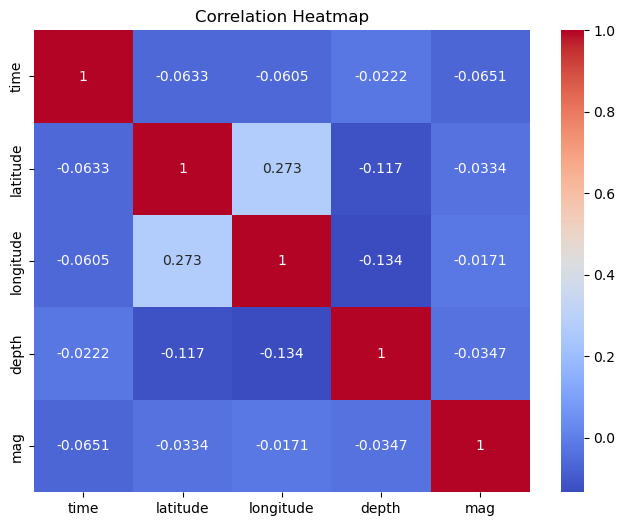

In [14]:
# Correlation heatmap
df_corr = df[['time','latitude','longitude','depth','mag']].corr()
 
plt.figure(figsize=(8, 6))
sns.heatmap(df_corr , annot=True,fmt='.3g', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

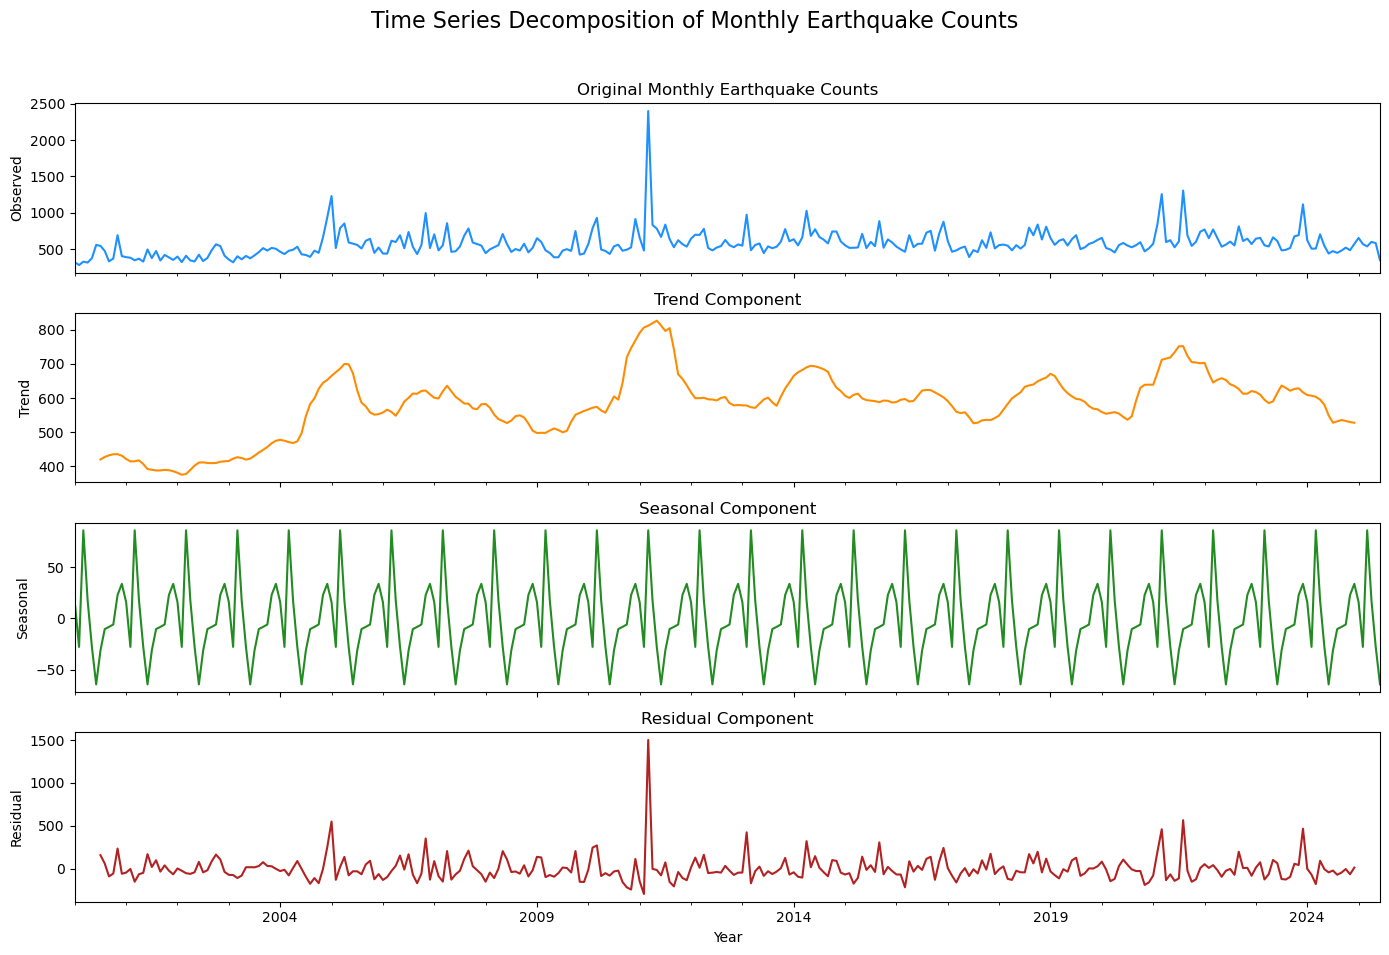

In [15]:
# Time Series Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

df_ts = df.set_index('time')


monthly_counts = df_ts['id'].resample('ME').count()


decomposition = seasonal_decompose(monthly_counts, model='additive', period=12)

fig, (ax1, ax2,ax3, ax4) = plt.subplots(4, 1, figsize=(14, 10), sharex=True)
fig.suptitle('Time Series Decomposition of Monthly Earthquake Counts', fontsize=16)

decomposition.observed.plot(ax=ax1, legend=False, color='dodgerblue')
ax1.set_ylabel('Observed')
ax1.set_title('Original Monthly Earthquake Counts')

decomposition.trend.plot(ax=ax2, legend=False, color='darkorange')
ax2.set_ylabel('Trend')
ax2.set_title('Trend Component')

decomposition.seasonal.plot(ax=ax3, legend=False, color='forestgreen')
ax3.set_ylabel('Seasonal')
ax3.set_title('Seasonal Component')

decomposition.resid.plot(ax=ax4, legend=False, color='firebrick')
ax4.set_ylabel('Residual')
ax4.set_title('Residual Component')


plt.xlabel('Year')
plt.tight_layout(rect=[0, 0.03, 1, 0.96])

plt.show()

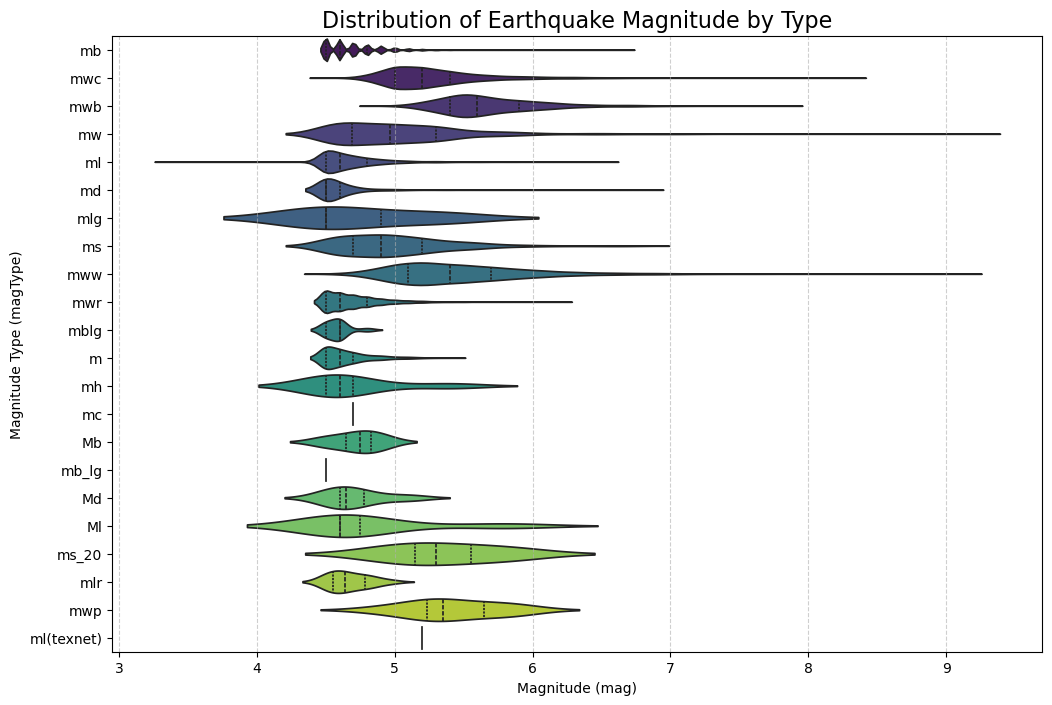

In [16]:
# Relationship Between Magnitude vs. Magnitude Type

plt.figure(figsize=(12, 8))
sns.violinplot(data=df, x='mag', y='magType', palette='viridis', inner='quartile', hue='magType', legend=False)
plt.title('Distribution of Earthquake Magnitude by Type', fontsize=16)
plt.xlabel('Magnitude (mag)')
plt.ylabel('Magnitude Type (magType)')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

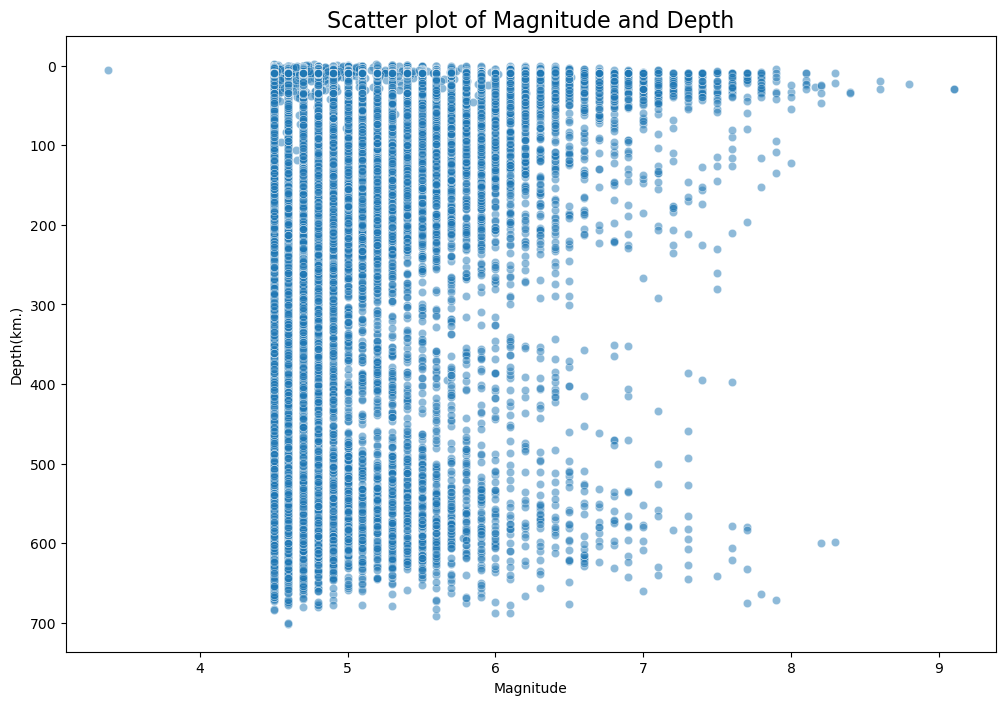

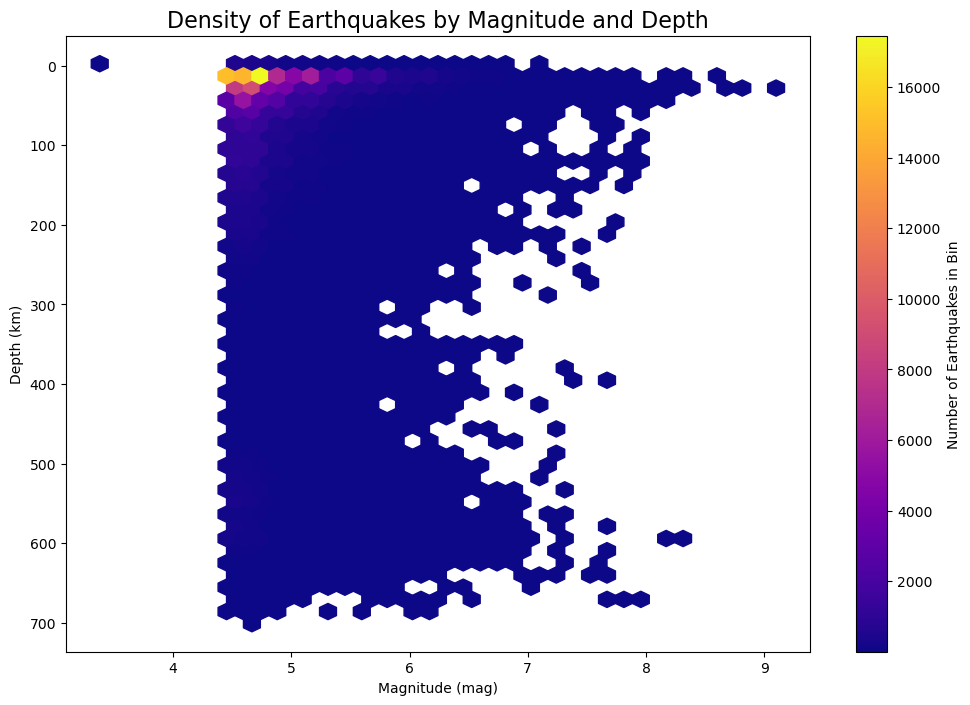

In [17]:
# Relationship Between Magnitude vs. Depth
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='mag', y='depth', alpha=0.5)
plt.title('Scatter plot of Magnitude and Depth', fontsize=16)
plt.xlabel('Magnitude')
plt.ylabel('Depth(km.)')
plt.gca().invert_yaxis()
plt.show()


# df_filtered = df[df['depth'] <= 400]
plt.figure(figsize=(12, 8))
plt.hexbin(df['mag'], df['depth'], gridsize=40, cmap='plasma', mincnt=1)
plt.title('Density of Earthquakes by Magnitude and Depth', fontsize=16)
plt.xlabel('Magnitude (mag)')
plt.ylabel('Depth (km)')
plt.gca().invert_yaxis()
cb = plt.colorbar(label='Number of Earthquakes in Bin')
plt.show()